## EDA Analysis

## Importing Libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the File

In [11]:
# read and show the head of the dataset
df = pd.read_csv('../dataset/full_COA_v3.csv' , index_col='Time',parse_dates=True)
df.head()

,COA,temp,dewPoint,humidity,windSpeed,year,quarter,month,day,weekday_0,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_name,hour_24,weekday_no,weekend_bool,school_vacation
Time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 01:00:00,5986.0,13.98,0.01,0.38,3.09,2012,1,1,1,0,...,0,0,0,0,1,Sunday,1,6,0.0,0.0
2012-01-01 02:00:00,5547.0,11.98,0.99,0.47,2.06,2012,1,1,1,0,...,0,0,0,0,1,Sunday,2,6,0.0,0.0
2012-01-01 03:00:00,5233.0,11.98,0.99,0.47,2.06,2012,1,1,1,0,...,0,0,0,0,1,Sunday,3,6,0.0,0.0
2012-01-01 04:00:00,5150.0,11.98,0.01,0.44,2.06,2012,1,1,1,0,...,0,0,0,0,1,Sunday,4,6,0.0,0.0
2012-01-01 05:00:00,5235.0,11.98,0.01,0.44,3.60,2012,1,1,1,0,...,0,0,0,0,1,Sunday,5,6,0.0,0.0


In [12]:
# change frequency to Hour
df.index.freq = 'H'

In [13]:
# explore the tail of the dataset
df.tail()

,COA,temp,dewPoint,humidity,windSpeed,year,quarter,month,day,weekday_0,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_name,hour_24,weekday_no,weekend_bool,school_vacation
Time,,,,,,,,,,,,,,,,,,,,,
2017-12-31 19:00:00,9495.0,18.98,-2.00,0.24,1.5,2017,4,12,31,0,...,0,0,0,0,1,Sunday,19,6,0.0,0.0
2017-12-31 20:00:00,9365.0,16.98,-2.00,0.27,1.5,2017,4,12,31,0,...,0,0,0,0,1,Sunday,20,6,0.0,0.0
2017-12-31 21:00:00,9250.0,15.98,-2.00,0.29,1.5,2017,4,12,31,0,...,0,0,0,0,1,Sunday,21,6,0.0,0.0
2017-12-31 22:00:00,8931.0,14.98,-2.00,0.31,1.0,2017,4,12,31,0,...,0,0,0,0,1,Sunday,22,6,0.0,0.0
2017-12-31 23:00:00,8679.0,12.98,-1.01,0.38,0.0,2017,4,12,31,0,...,0,0,0,0,1,Sunday,23,6,0.0,0.0


In [27]:
df.columns

Index(['COA', 'temp', 'dewPoint', 'humidity', 'windSpeed', 'year', 'quarter',
       'month', 'day', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weekday_name', 'hour_24',
       'weekday_no', 'weekend_bool', 'school_vacation'],
      dtype='object')

In [14]:
len(df)

52607

## Showing Seasonality

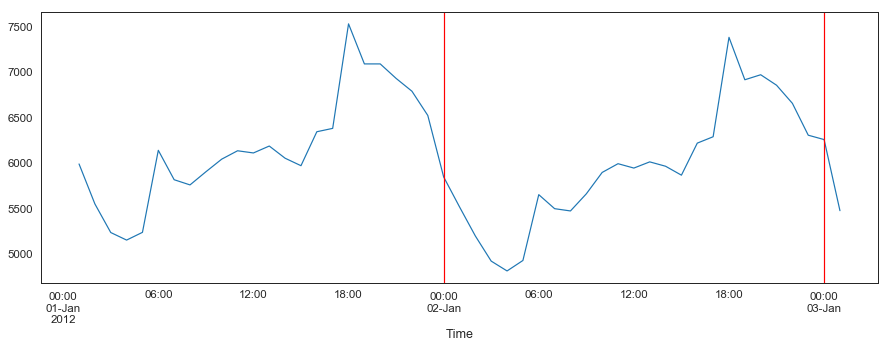

In [15]:
# Showing daily seasonality 
# Daily seasonality is clear in the plot
df['2012-01-01 01:00:00':'2012-01-03 01:00:00'].COA.plot(figsize=(15,5))
plt.axvline('2012-01-02 00:00:00' , c='r')
plt.axvline('2012-01-03 00:00:00' , c='r')

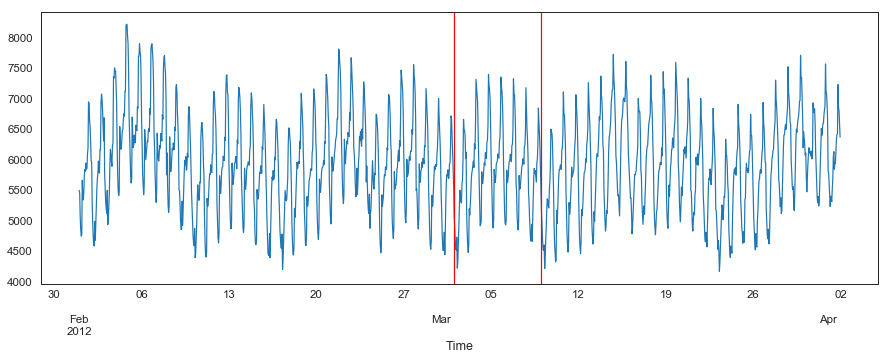

In [16]:
# Showing weekly seasonality
# Weekly seasonality is clear in the plot
df['2012-02-01':'2012-4-01'].COA.plot(figsize=(15,5))
plt.axvline('2012-03-02' , c='r')
plt.axvline('2012-03-09',c='r')

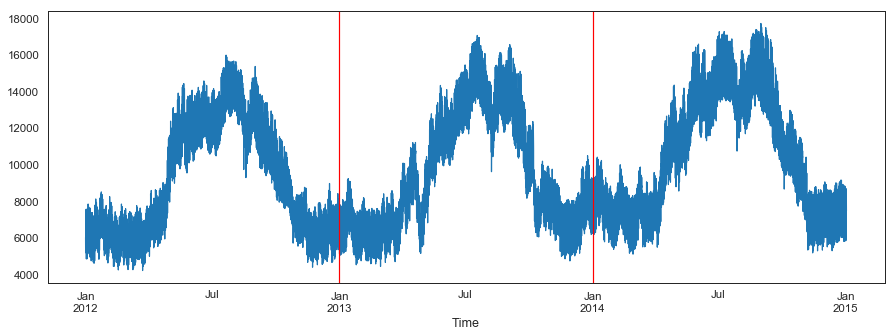

In [17]:
# Showing Yearly seasonality
# Yearly seasonality is clear in the plot
df['2012-01-01':'2015-01-01'].COA.plot(figsize=(15,5))
plt.axvline('2013-01-01' , c='r')
plt.axvline('2014-01-01',c='r')

## EDA

### Boxplot

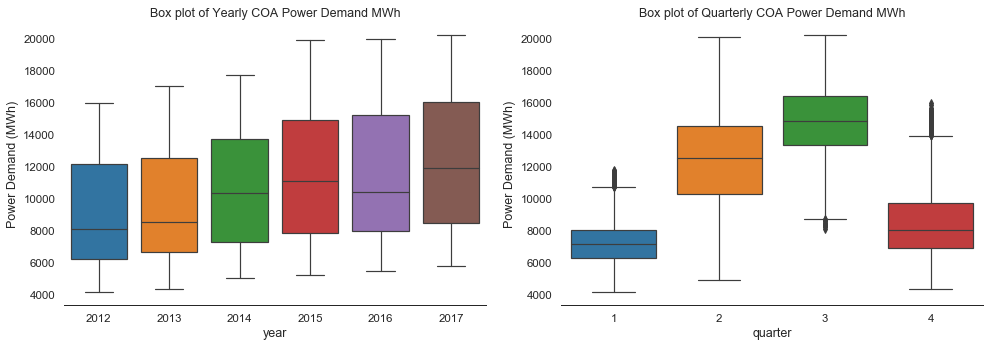

In [18]:
# Showing boxplots
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="year", y="COA", data=df)
plt.xlabel('year')
plt.ylabel('Power Demand (MWh)')
plt.title('Box plot of Yearly COA Power Demand MWh')
sns.despine(left=True)
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(x="quarter", y="COA", data=df)
plt.xlabel('quarter')
plt.ylabel('Power Demand (MWh)')
plt.title('Box plot of Quarterly COA Power Demand MWh')
sns.despine(left=True)
plt.tight_layout();

### Plotting Power Demand by Year,Quarter,Month and Day

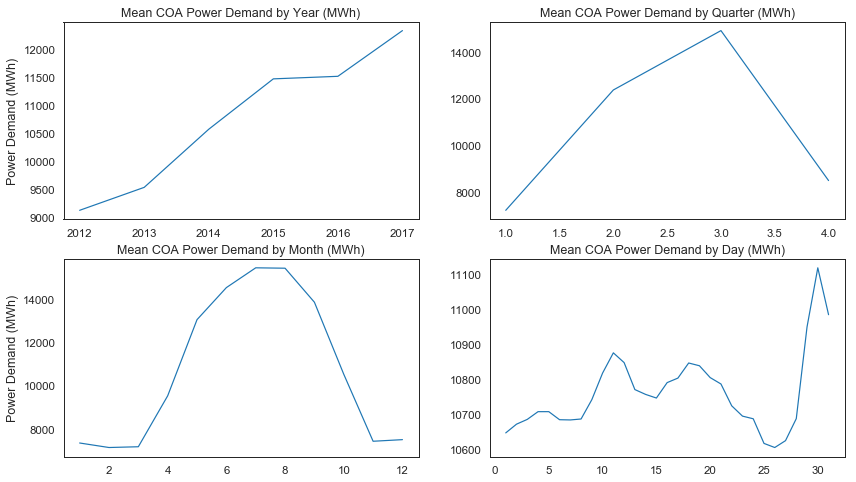

In [19]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('year').COA.agg('mean').plot()
plt.xlabel('')
plt.title('Mean COA Power Demand by Year (MWh)')
plt.ylabel('Power Demand (MWh)')

plt.subplot(2,2,2)
df.groupby('quarter').COA.agg('mean').plot()
plt.xlabel('')
plt.title('Mean COA Power Demand by Quarter (MWh)')

plt.subplot(2,2,3)
df.groupby('month').COA.agg('mean').plot()
plt.xlabel('')
plt.title('Mean COA Power Demand by Month (MWh)')
plt.ylabel('Power Demand (MWh)')

plt.subplot(2,2,4)
df.groupby('day').COA.agg('mean').plot()
plt.xlabel('')
plt.title('Mean COA Power Demand by Day (MWh)');

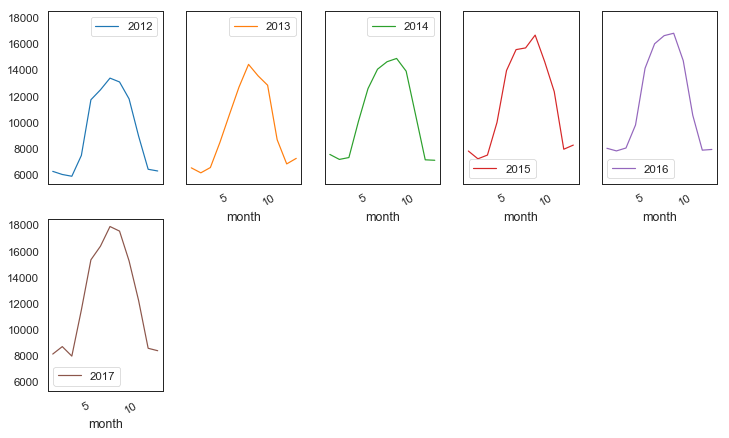

In [20]:
pd.pivot_table(df, values = "COA", 
               columns = "year", index = "month").plot(subplots = True, figsize=(12, 12), layout=(3, 5), sharey=True);

In [29]:
df.weekend_bool = df.weekend_bool.apply(lambda x:'weekend' if x == 1 else 'weekday')

In [46]:
df[(df.weekend_bool == 'weekday') & (df.year == 2012)].COA.mean()

9227.025449339908

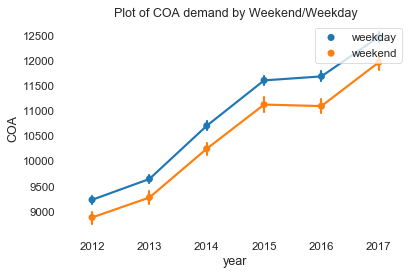

In [41]:
plt1=sns.factorplot('year','COA',hue='weekend_bool',
                    data=df, size=4, aspect=1.5, legend=False)                                                                                                                                                                                                                                                                                                                                             
plt.title('Plot of COA demand by Weekend/Weekday')                                                             
plt.tight_layout()                                                                                                                  
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper right');

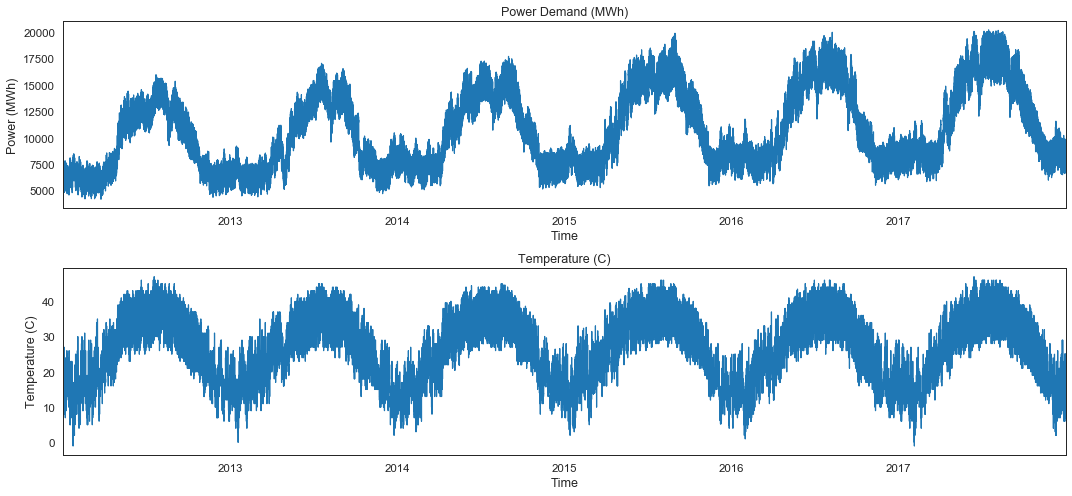

In [18]:
# Plotting Power Load and Temperature
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,7))
axes[0].set_title('Power Demand (MWh)')
axes[0].set_ylabel('Power (MWh)')
axes[0].set_xlabel('Datetime')
df.COA.plot(ax=axes[0])
axes[1].set_title('Temperature (C)')
axes[1].set_ylabel('Temperature (C)')
axes[1].set_xlabel('Datetime')
df.temp.plot(ax=axes[1])
plt.tight_layout()
plt.show()

In [28]:
df_l = df.reset_index()

## Doing Coorelation Matrix

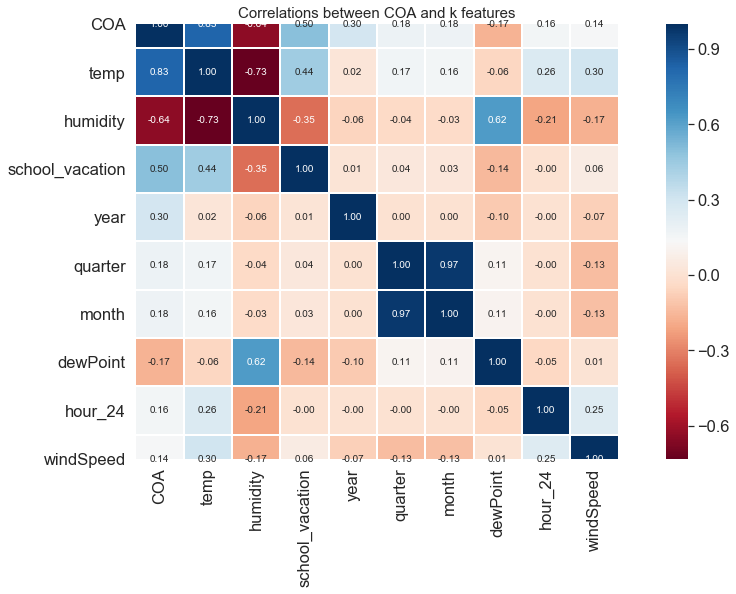

In [29]:
#COA correlation matrix
corrmat = abs(df_l.drop(columns=['Time']).iloc[:df_l.drop(columns=['Time']).shape[0],:].corr())
plt.figure(figsize=(17, 8))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'COA')['COA'].index
cm = np.corrcoef(df_l.drop(columns=['Time']).iloc[:df_l.drop(columns=['Time']).shape[0],:][cols].values.T)
sns.set(font_scale=1.50)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,
                 cmap = 'RdBu', linecolor = 'white', linewidth = 1)
plt.title("Correlations between COA and k features", fontsize =15)
plt.show()